In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import statsmodels.api as sm

In [7]:
pd.set_option('display.max_columns',None) #to display all columns and rows of dataframe 

In [17]:
df_original=pd.read_csv("CarPrice_Assignment.csv")

# 1-Data Cleaning

In [18]:
df=df_original.copy()#make a copy

In [19]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [20]:
df.isnull().sum() #check null

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [21]:
df.duplicated().any() #check duplicates

False

In [22]:
df.shape #check shape

(205, 26)

In [23]:
df.nunique() #check unique values

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [26]:
df.drop(["car_ID","curbweight","CarName"],axis=1,inplace=True) #drop unwanted columns, reason: variety of values is huge

In [28]:
df.nunique()

symboling             6
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [43]:
l=[df[i].unique() for i in df.columns]
l

[array([ 3,  1,  2,  0, -1, -2], dtype=int64),
 array(['gas', 'diesel'], dtype=object),
 array(['std', 'turbo'], dtype=object),
 array(['two', 'four'], dtype=object),
 array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
       dtype=object),
 array(['rwd', 'fwd', '4wd'], dtype=object),
 array(['front', 'rear'], dtype=object),
 array([ 88.6,  94.5,  99.8,  99.4, 105.8,  99.5, 101.2, 103.5, 110. ,
         88.4,  93.7, 103.3,  95.9,  86.6,  96.5,  94.3,  96. , 113. ,
        102. ,  93.1,  95.3,  98.8, 104.9, 106.7, 115.6,  96.6, 120.9,
        112. , 102.7,  93. ,  96.3,  95.1,  97.2, 100.4,  91.3,  99.2,
        107.9, 114.2, 108. ,  89.5,  98.4,  96.1,  99.1,  93.3,  97. ,
         96.9,  95.7, 102.4, 102.9, 104.5,  97.3, 104.3, 109.1]),
 array([168.8, 171.2, 176.6, 177.3, 192.7, 178.2, 176.8, 189. , 193.8,
        197. , 141.1, 155.9, 158.8, 157.3, 174.6, 173.2, 144.6, 150. ,
        163.4, 157.1, 167.5, 175.4, 169.1, 170.7, 172.6, 199.6, 191.7,
        159.1, 166.8, 169

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    object 
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  enginetype        205 non-null    object 
 12  cylindernumber    205 non-null    object 
 13  enginesize        205 non-null    int64  
 14  fuelsystem        205 non-null    object 
 15  boreratio         205 non-null    float64
 16  stroke            205 non-null    float64
 1

In [37]:
df.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem',
       'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg', 'price'],
      dtype='object')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

[<AxesSubplot:xlabel='symboling', ylabel='price'>,
 <AxesSubplot:xlabel='fueltype', ylabel='price'>,
 <AxesSubplot:xlabel='aspiration', ylabel='price'>,
 <AxesSubplot:xlabel='doornumber', ylabel='price'>,
 <AxesSubplot:xlabel='carbody', ylabel='price'>,
 <AxesSubplot:xlabel='drivewheel', ylabel='price'>,
 <AxesSubplot:xlabel='enginelocation', ylabel='price'>,
 <AxesSubplot:xlabel='wheelbase', ylabel='price'>,
 <AxesSubplot:xlabel='carlength', ylabel='price'>,
 <AxesSubplot:xlabel='carwidth', ylabel='price'>,
 <AxesSubplot:xlabel='carheight', ylabel='price'>,
 <AxesSubplot:xlabel='enginetype', ylabel='price'>,
 <AxesSubplot:xlabel='cylindernumber', ylabel='price'>,
 <AxesSubplot:xlabel='enginesize', ylabel='price'>,
 <AxesSubplot:xlabel='fuelsystem', ylabel='price'>,
 <AxesSubplot:xlabel='boreratio', ylabel='price'>,
 <AxesSubplot:xlabel='stroke', ylabel='price'>,
 <AxesSubplot:xlabel='compressionratio', ylabel='price'>,
 <AxesSubplot:xlabel='horsepower', ylabel='price'>,
 <AxesSubplot:

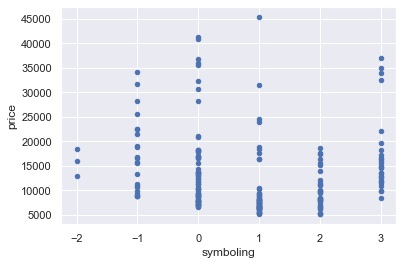

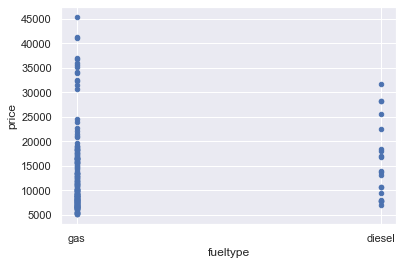

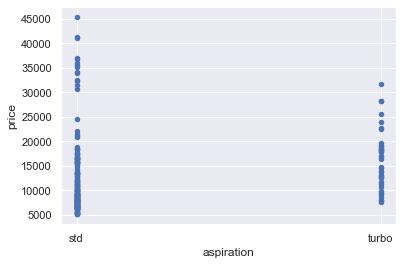

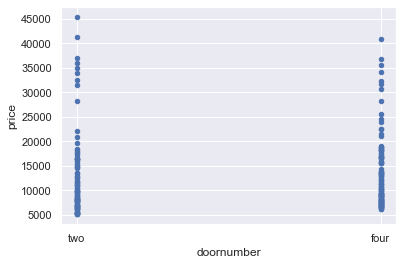

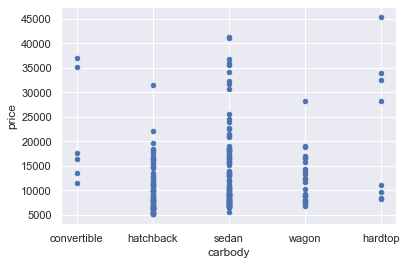

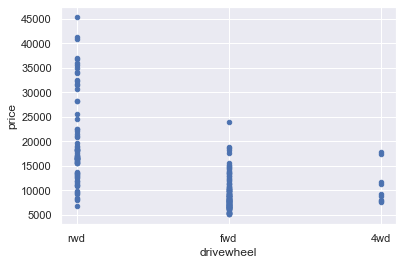

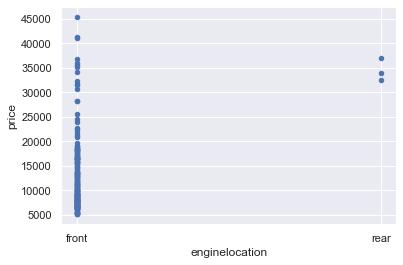

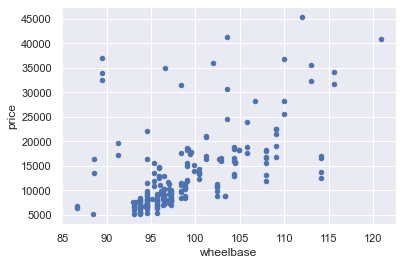

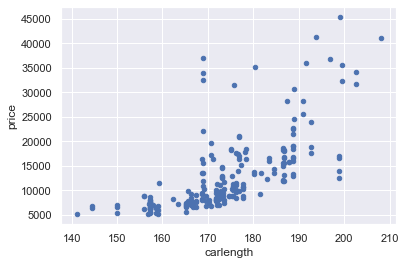

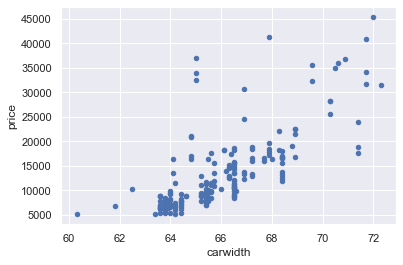

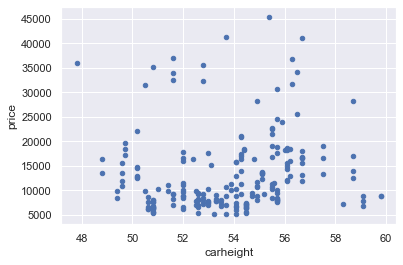

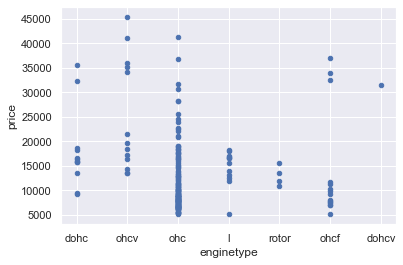

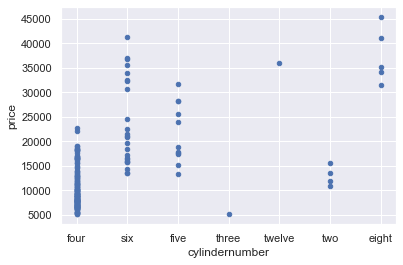

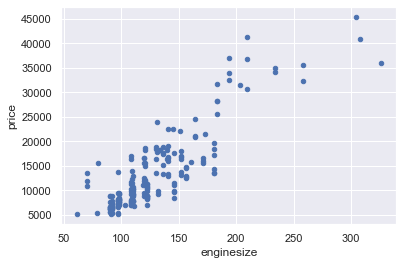

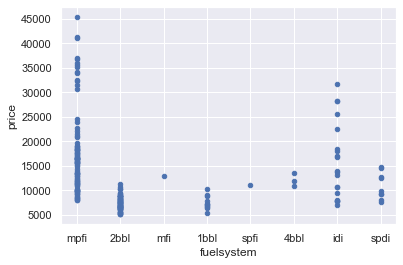

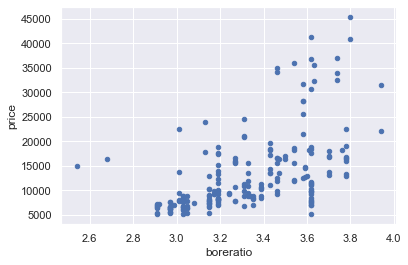

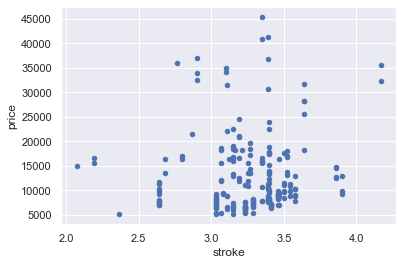

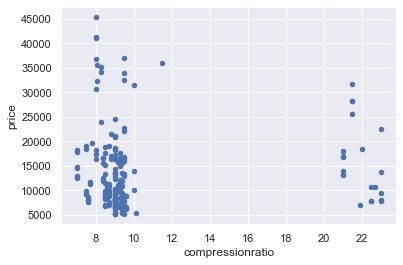

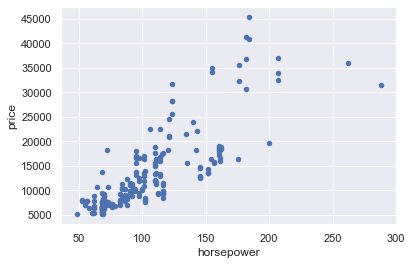

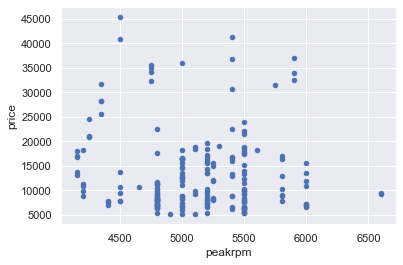

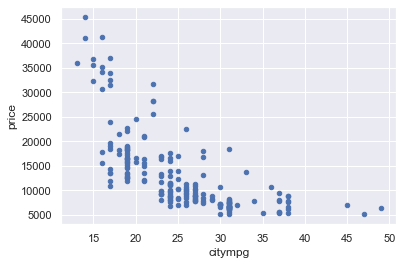

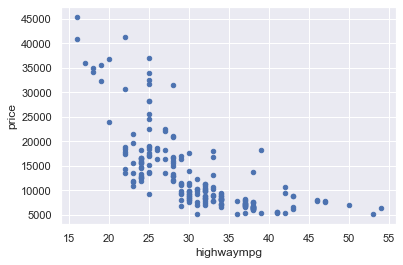

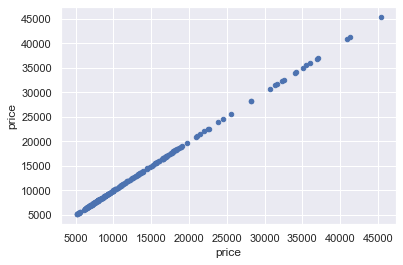

In [42]:
l=[df.plot(kind='scatter',x=i,y='price') for i in df.columns]
l


In [46]:
df.drop(['enginelocation'],axis=1,inplace=True)#removing column as plot b/wprice and engine location is unbalance only 3 out of 205 are of one category

In [55]:
df_cleaned=df.copy() #creating check point

# 2-Prepocessing

In [51]:
df.corr() # -1<corr<1
#keep values near to -1 and near to 1 and remove columns having corr near to 0 wb/w independent and dependent feature

,symboling,wheelbase,carlength,carwidth,carheight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,-0.531954,1.000000,0.874587,0.795144,0.589435,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,-0.357612,0.874587,1.000000,0.841118,0.491029,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,-0.232919,0.795144,0.841118,1.000000,0.279210,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,-0.541038,0.589435,0.491029,0.279210,1.000000,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
enginesize,-0.105790,0.569329,0.683360,0.735433,0.067149,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,-0.130051,0.488750,0.606454,0.559150,0.171071,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984
horsepower,0.070873,0.353294,0.552623,0.640732,-0.108802,0.809769,0.573677,0.080940,-0.204326,1.000000,0.131073,-0.801456,-0.770544,0.808139


<AxesSubplot:>

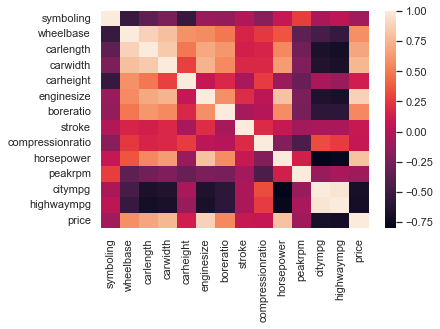

In [52]:
sns.heatmap(df.corr()) #heatmap of corr

In [67]:
temp=df.iloc[:,:-1]

In [68]:
#mapping of categorical data here i will use get_dummies
df_encoded=pd.get_dummies(temp)

In [69]:
df_encoded.head()

,symboling,wheelbase,carlength,carwidth,carheight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,88.6,168.8,64.1,48.8,130,3.47,2.68,9.0,111,5000,21,27,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,130,3.47,2.68,9.0,111,5000,21,27,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,152,2.68,3.47,9.0,154,5000,19,26,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,109,3.19,3.40,10.0,102,5500,24,30,0,1,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,136,3.19,3.40,8.0,115,5500,18,22,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor #import VIF

In [70]:
#to check mulcollinearity,
#VIF<=4 no multicl, VIF>=10 high multicoll(drop them)
vif_data=pd.DataFrame()
vif_data['Features']=df_encoded.columns
vif_data['vif']=[variance_inflation_factor(df_encoded.values, i) for i in range(len(df_encoded.columns))]

E:\software\anaconda\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [71]:
vif_data

,Features,vif
0,symboling,3.656564
1,wheelbase,13.875525
2,carlength,13.985942
3,carwidth,10.385527
4,carheight,3.964179
5,enginesize,39.014927
6,boreratio,7.665506
7,stroke,3.318889
8,compressionratio,167.896800
9,horsepower,28.298334


In [72]:
#drop vif >=10
df_no_mul4=df_encoded.drop(['wheelbase','carlength','carwidth','enginesize','compressionratio','horsepower','citympg','highwaympg'],axis=1)

In [73]:
df_no_mul4

,symboling,carheight,boreratio,stroke,peakrpm,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,48.8,3.47,2.68,5000,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,3,48.8,3.47,2.68,5000,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,1,52.4,2.68,3.47,5000,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,2,54.3,3.19,3.40,5500,0,1,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,2,54.3,3.19,3.40,5500,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,55.5,3.78,3.15,5400,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
201,-1,55.5,3.78,3.15,5300,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
202,-1,55.5,3.58,2.87,5500,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
203,-1,55.5,3.01,3.40,4800,1,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


# Create model

In [77]:
x=df_encoded
y=df_cleaned.loc[:,'price']

In [79]:
x.shape, len(y)

((205, 49), 205)

In [81]:
X=sm.add_constant(x)
model=sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     60.69
Date:                Thu, 16 Mar 2023   Prob (F-statistic):           3.29e-79
Time:                        14:03:47   Log-Likelihood:                -1852.6
No. Observations:                 205   AIC:                             3785.
Df Residuals:                     165   BIC:                             3918.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -1.319e+04   4233.641     -3.115      0.002   -2.15e+04   -4826.822
symboling               -45.2897    243.786     -0.186      0.853    -526.632     436.052
wheelbase                 3.5661     98.208      0.036      0.971    -190.341     197.473
carlength               -32.2466     48.125     -0.670      0.504    -127.268      62.774
carwidth                714.5871    238.503      2.996      0.003     243.676    1185.499
carheight               172.3431    129.363      1.332      0.185     -83.076     427.763
enginesize              149.7221     23.814      6.287      0.000     102.703     196.741
boreratio             -2883.3481   1622.931     -1.777      0.077   -6087.737     321.041
stroke                -4420.1860    922.301     -4.793      0.000   -6241.220   -2599.152
compressionratio       -259.1053    517.912     -0.500      0.618   -1281.694     763.484
horsepower               36.9543     21.357      1.730      0.085      -5.215      79.123
peakrpm                   2.5171      0.624      4.036      0.000       1.286       3.748
citympg                -242.2105    149.591     -1.619      0.107    -537.569      53.148
highwaympg              246.6096    136.951      1.801      0.074     -23.793     517.012
fueltype_diesel       -2646.5832   3023.188     -0.875      0.383   -8615.704    3322.538
fueltype_gas          -1.054e+04   3115.121     -3.383      0.001   -1.67e+04   -4388.696
aspiration_std        -7502.9720   2194.053     -3.420      0.001   -1.18e+04   -3170.933
aspiration_turbo      -5682.9442   2133.116     -2.664      0.008   -9894.665   -1471.223
doornumber_four       -6541.6447   2167.817     -3.018      0.003   -1.08e+04   -2261.407
doornumber_two        -6644.2715   2107.437     -3.153      0.002   -1.08e+04   -2483.252
carbody_convertible     724.9214   1146.885      0.632      0.528   -1539.541    2989.384
carbody_hardtop       -3461.6943   1171.394     -2.955      0.004   -5774.549   -1148.840
carbody_hatchback     -3775.2733    994.646     -3.796      0.000   -5739.148   -1811.399
carbody_sedan         -3003.2119   1009.807     -2.974      0.003   -4997.021   -1009.402
carbody_wagon         -3670.6581   1177.133     -3.118      0.002   -5994.843   -1346.473
drivewheel_4wd        -4454.3092   1485.354     -2.999      0.003   -7387.060   -1521.558
drivewheel_fwd        -5020.3646   1547.900     -3.243      0.001   -8076.610   -1964.119
drivewheel_rwd        -3711.2424   1534.720     -2.418      0.017   -6741.463    -681.022
enginetype_dohc       -1219.3008   1195.522     -1.020      0.309   -3579.795    1141.193
enginetype_dohcv      -1.204e+04   3848.275     -3.130      0.002   -1.96e+04   -4445.818
enginetype_l            589.0325   1611.800      0.365      0.715   -2593.379    3771.444
enginetype_ohc         

In [97]:
p_value = pd.DataFrame(model.pvalues, columns = ['p-value'])

In [106]:
col_p_value = list(p_value[p_value['p-value']<.2].index)

In [107]:
len(col_p_value)

35

In [110]:
X = x[col_p_value[1:]]
X= sm.add_constant(X)
model=sm.OLS(y,X).fit()
model.summary()

E:\software\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     80.37
Date:                Thu, 16 Mar 2023   Prob (F-statistic):           2.16e-86
Time:                        14:15:15   Log-Likelihood:                -1855.9
No. Observations:                 205   AIC:                             3774.
Df Residuals:                     174   BIC:                             3877.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -1.685e+04   6110.805     -2.757      0.006   -2.89e+04   -4786.911
carwidth                651.1418    175.884      3.702      0.000     304.001     998.282
carheight               190.0328    110.531      1.719      0.087     -28.121     408.186
enginesize              153.9875     21.142      7.283      0.000     112.259     195.716
boreratio             -3125.0695   1565.907     -1.996      0.048   -6215.687     -34.452
stroke                -4277.9352    871.954     -4.906      0.000   -5998.903   -2556.967
horsepower               23.0100     17.487      1.316      0.190     -11.505      57.525
peakrpm                   2.4896      0.540      4.606      0.000       1.423       3.556
citympg                -265.7638    135.058     -1.968      0.051    -532.326       0.799
highwaympg              279.7065    128.970      2.169      0.031      25.159     534.254
fueltype_gas          -2120.2705    990.046     -2.142      0.034   -4074.316    -166.225
aspiration_std        -9633.3678   3106.044     -3.101      0.002   -1.58e+04   -3502.995
aspiration_turbo      -7214.3858   3055.822     -2.361      0.019   -1.32e+04   -1183.137
doornumber_four       -8357.8579   3105.202     -2.692      0.008   -1.45e+04   -2229.147
doornumber_two        -8489.8958   3027.443     -2.804      0.006   -1.45e+04   -2514.658
carbody_hardtop       -4010.5045   1276.666     -3.141      0.002   -6530.250   -1490.759
carbody_hatchback     -4248.0333   1084.766     -3.916      0.000   -6389.026   -2107.041
carbody_sedan         -3628.5484   1151.551     -3.151      0.002   -5901.354   -1355.743
carbody_wagon         -4344.0962   1317.227     -3.298      0.001   -6943.896   -1744.296
drivewheel_4wd        -5749.4148   2047.655     -2.808      0.006   -9790.855   -1707.975
drivewheel_fwd        -6355.4960   2142.746     -2.966      0.003   -1.06e+04   -2126.376
drivewheel_rwd        -4742.8428   2120.374     -2.237      0.027   -8927.807    -557.879
enginetype_dohcv      -9139.0509   4108.649     -2.224      0.027   -1.72e+04   -1029.845
enginetype_ohc         3137.3200    632.607      4.959      0.000    1888.749    4385.891
enginetype_ohcf        2812.8939   1224.657      2.297      0.023     395.798    5229.990
enginetype_ohcv       -6147.3714   1124.723     -5.466      0.000   -8367.229   -3927.514
enginetype_rotor        312.2866   1572.287      0.199      0.843   -2790.924    3415.497
cylindernumber_eight     49.2160   4226.067      0.012      0.991   -8291.737    8390.169
cylindernumber_five   -7943.2951   3124.433     -2.542      0.012   -1.41e+04   -1776.629
cylindernumber_four   -8925.2417   2617.233     -3.410      0.001   -1.41e+04   -3759.632
cylindernumber_six    -5998.1494   3114.855     -1.926      0.056   -1.21e+04     149.614
cylindernumber_twelve -

In [111]:
#create linear regression

In [113]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [116]:
x1=x[col_p_value[1:]]


In [118]:
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.2,random_state=42)

In [119]:
obj=LinearRegression()
linear_model=obj.fit(x_train,y_train)
yhat=linear_model.predict(x_test)

E:\software\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

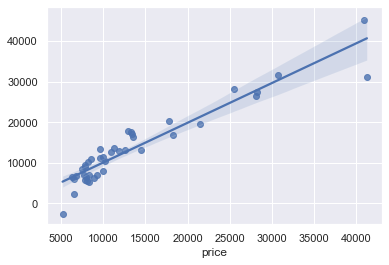

In [132]:
#sns.scatterplot(yhat,y_test)
sns.regplot(y_test,yhat)

In [127]:
linear_model.score(x_train,y_train)

0.9382413980996576

In [130]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [129]:
mean_squared_error(yhat,y_test)

9127195.892988838

In [131]:
mean_absolute_error(yhat,y_test)

2319.8592283419584

In [133]:
#apply lasso regularization to penalise features

In [137]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold

E:\software\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

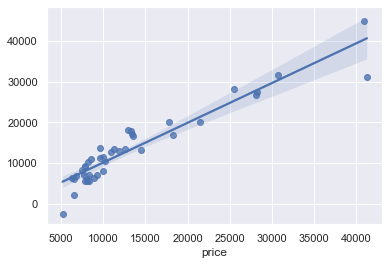

In [138]:
model_lasso=Lasso(alpha=0.02)
model_lasso.fit(x_train,y_train)
yhat_lasso=model_lasso.predict(x_test)
sns.regplot(y_test,yhat_lasso)

In [141]:
model_lasso.score(x_train,y_train)

0.9380815336898086

In [142]:
mean_absolute_error(yhat_lasso,y_test)

2287.3577125602233

In [143]:
#use apply lassocv, ie.e., use hyperparameter lambda, lasscv will find best lambda value and penalize

In [157]:
cross_validation=RepeatedKFold(n_splits=10,n_repeats=3,random_state=1)
model_lassocv=LassoCV(alphas=np.arange(0,2,0.02),cv=cross_validation,n_jobs=-1)
model_lassocv.fit(x_train,y_train)
yhat_lassocv=model_lassocv.predict(x_test)

E:\software\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
E:\software\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
E:\software\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 247935564.7795105, tolerance: 870078.1469064627
  model = cd_fast.enet_coordinate_descent_gram(
E:\software\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not 

E:\software\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
E:\software\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
E:\software\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 252807988.85773277, tolerance: 898070.155768243
  model = cd_fast.enet_coordinate_descent_gram(
E:\software\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not 

E:\software\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

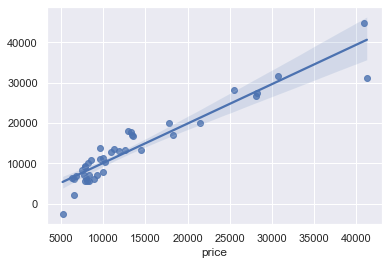

In [158]:
sns.regplot(y_test,yhat_lassocv)

In [159]:
model_lassocv.score(x_train,y_train), mean_absolute_error(yhat_lassocv,y_test)

(0.9380847151128726, 2287.7440425941304)

In [160]:
model_lassocv.alpha_

1.98